# ![title](images/ml_banner.jpeg)


# From Primer to Pro: completing a Data Science project with Machine Learning

Yesterday, we learnt about some of the key functionalities of the Pandas library. In particular, we learnt how to read in and manipulate a DataFrame, the Pandas premier data structure. 

In this tutorial, we will employ some of our learnings to build an end-to-end Machine Learning project, centered about learning how to map some stellar properties and elemental abundances to the stellar age. For now, we will treat our dataset as a data science playground first, but once Erwin shows you more about chemical evolution, you can adapt it to reflect your physical understanding. 

During today's tutorial, we will:

**Pandas Focused**:
* Import the necessary libraries and load the dataset.
* Perform exploratory data analysis to understand the structure and characteristics of the dataset.
* Preprocess the data to handle missing values, outliers, and any other issues.

**ML Focused**:
* Split the dataset into training and testing sets.
* Train one or more machine learning models on the training set.
* Evaluate the models' performance on the testing set and select the best performing model.
* Use the selected model to make predictions on new data.

**Visualisation Focused**:
* Summarize your findings and present your results in a clear and concise manner.

But before we jump in, let's first consider a brief history of Artificial Intelligence, followed by the FUNdamentals of machine learning (see what I did there?).

## A brief history of AI

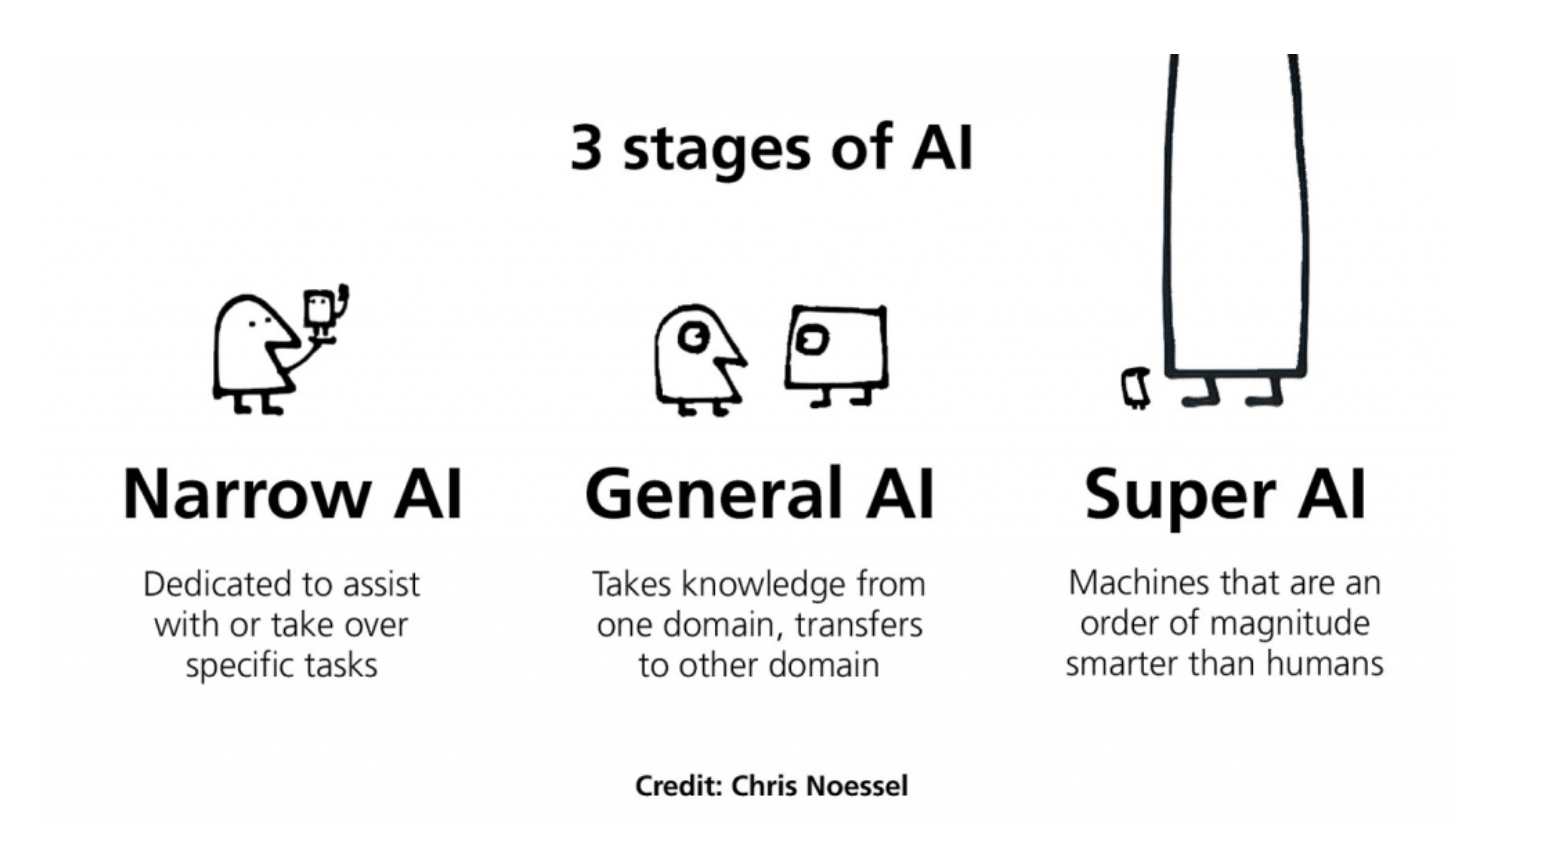

In [10]:
from IPython.display import Image
Image('images/ai_takeover.png', width=600) #credit: Deep Learning with Python, Chollet (2017)

* to be completed...
* talk about the perceptron

### Q1: What are some things you've heard about ML? What excites/terrifies you most about the whole thing?

## The Fundamentals of Machine Learning


* What is ML? 
* Flavours of ML: Supervised, Unsupervised, Semi-supervised
* Training and testing an ML algorithm 
* "Hi, I am GPT. ChatGPT."

Machine Learning (ML) is a branch of Artificial Intelligence (AI), where we use algorithms to automatically extract useful information from data. 

We often times use Artificial Intelligence (AI), Machine Learning (ML) and Deep Learning (DL) interchangeably. But there are some valuable differences, and the way to remember them is by considering the following conceptual flow:

Data -> Representation -> Features -> Model -> Output

ML encompasses DL. In the traditional setting of Machine Learning, what we do is we extract features that we think are relevant, and then learn the mapping between the features and the output. 
In the setting of Deep Learning, we humans don't worry about constructing the features, but instead we let it to the DL model to learn the best representation of the data, that will achieve the goal we want. Put it simply, let's say we want to classify cats from a dataset of images. In a traditional ML setting, we take those images, inspect them and come up with features like: colour, size, ear-to-nose ratio and then we use these features to map them to a meaningful output (cat class, dog class, human class, etc...). In a DL setting, we use the images themselves to perform this task. In terms of models, when we talk DL, we talk neural networks. When we talk traditional ML, we talk trees, support-vector machines. As of lately, with the advent of computing resources such as GPUs, DL has become the de-facto approach to solve most ML tasks. However, in this notebook, we will employ a more traditional ML setting.


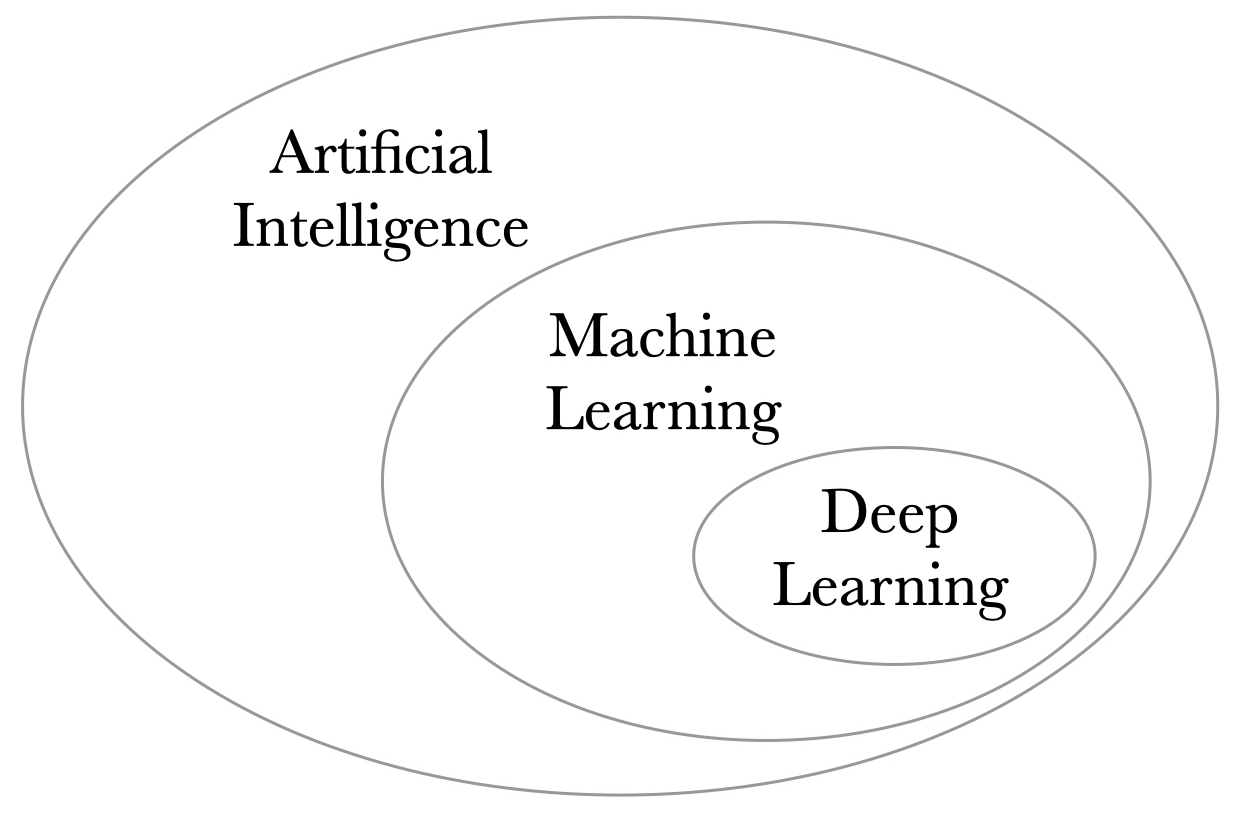

In [15]:
Image('images/AI_ML_DL.jpeg', width=600) #credit: Deep Learning with Python, Chollet (2017)

Keeping it simply, ML is having computers learn from data. And, in the process, make things easier for us. 

In our day to day lives, we want to solve these taks:

* classify things (very easy for humans). In my case, I can spot the mapo tofu dish 1 km away.
* predict things (depending on how many dimensions we're talking about, may be harder)
* imagine (domain of AGI, but with new developments in natural language processing, i.e. things like ChatGPT and text-to-image translation, like DALL-E-2, machines now help us imagine new worlds)

More formally, ML is concerned with three key concepts: Data, Model and Learning (The DML Trilogy). For the most part, we will worry about the Data.

To paraphrase Mitchell (1997), we say that the model M learns from data D if its performance on the task T improves after the data is taken into account. **The goal is to find good models that do a great job on yet unseen data (which we call the ability to generalise).** Learning means optimizing the parameters of the model so we can achieve our goal.  

For example, say we have a dataset consisting of images of cats and dogs (data D) and a model that has not seen the data (M). We want to classify cats and consider this to be our task (T). 

Before any learning is done, if we ask our model to classify any given image as a cat given four possible choices of cat, dog, human or robot, the model will not give any meaningful answer. The probability of getting the right answer at any time is 25% (either cat, dog, human, robot). Once we train the model by letting it "see" or learn from the data itself, our performance in the classification task is bound to improve.


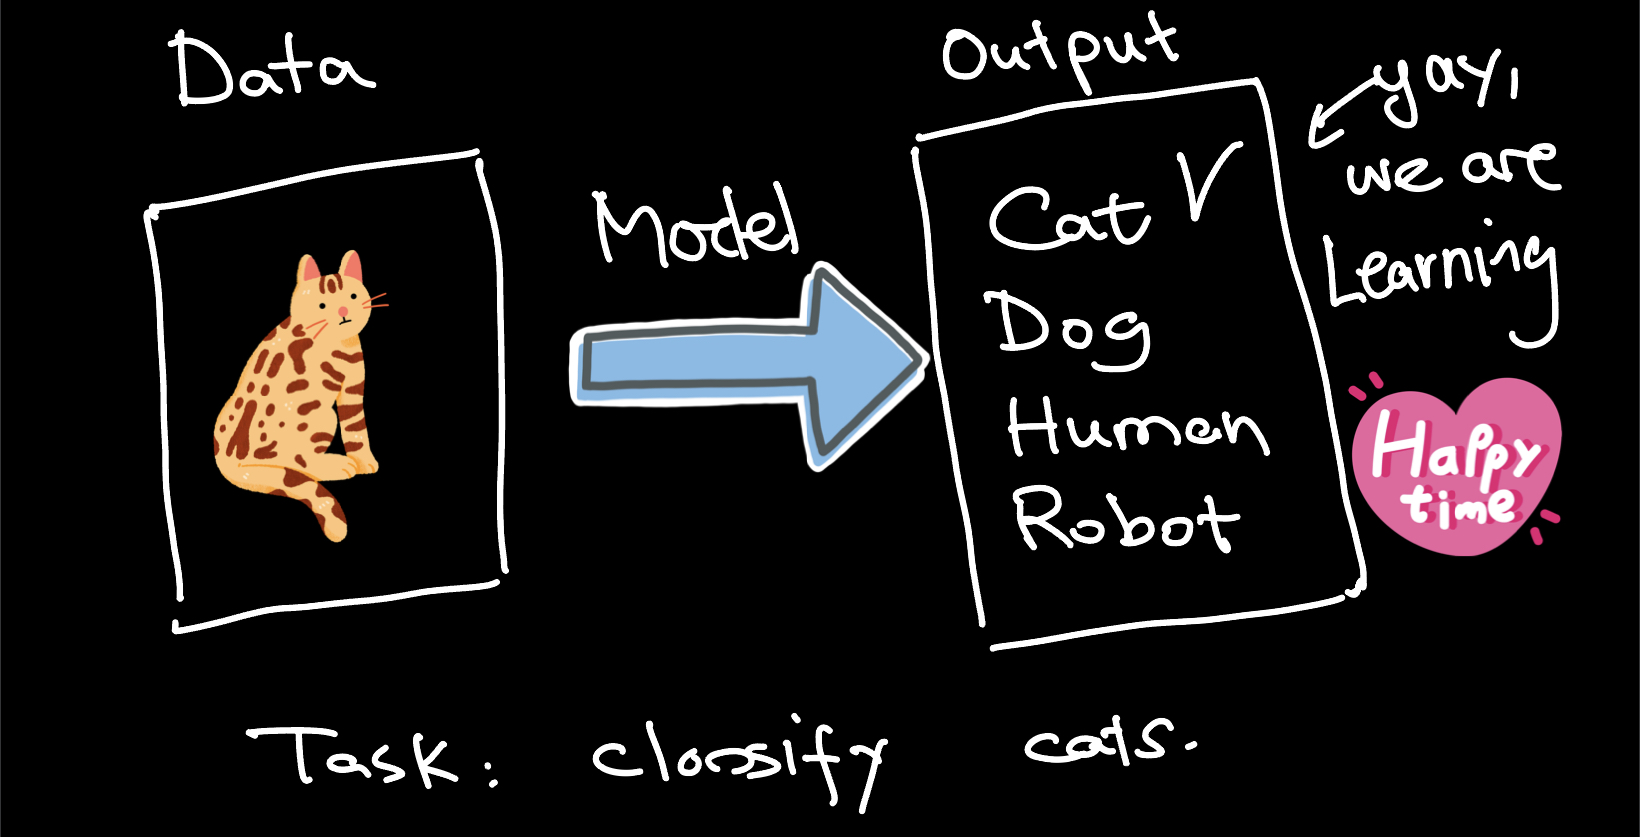

In [14]:
Image('images/kitties.jpg', width=600)

### Flavours of ML

* Supervised Learning
* Unsupervised Learning


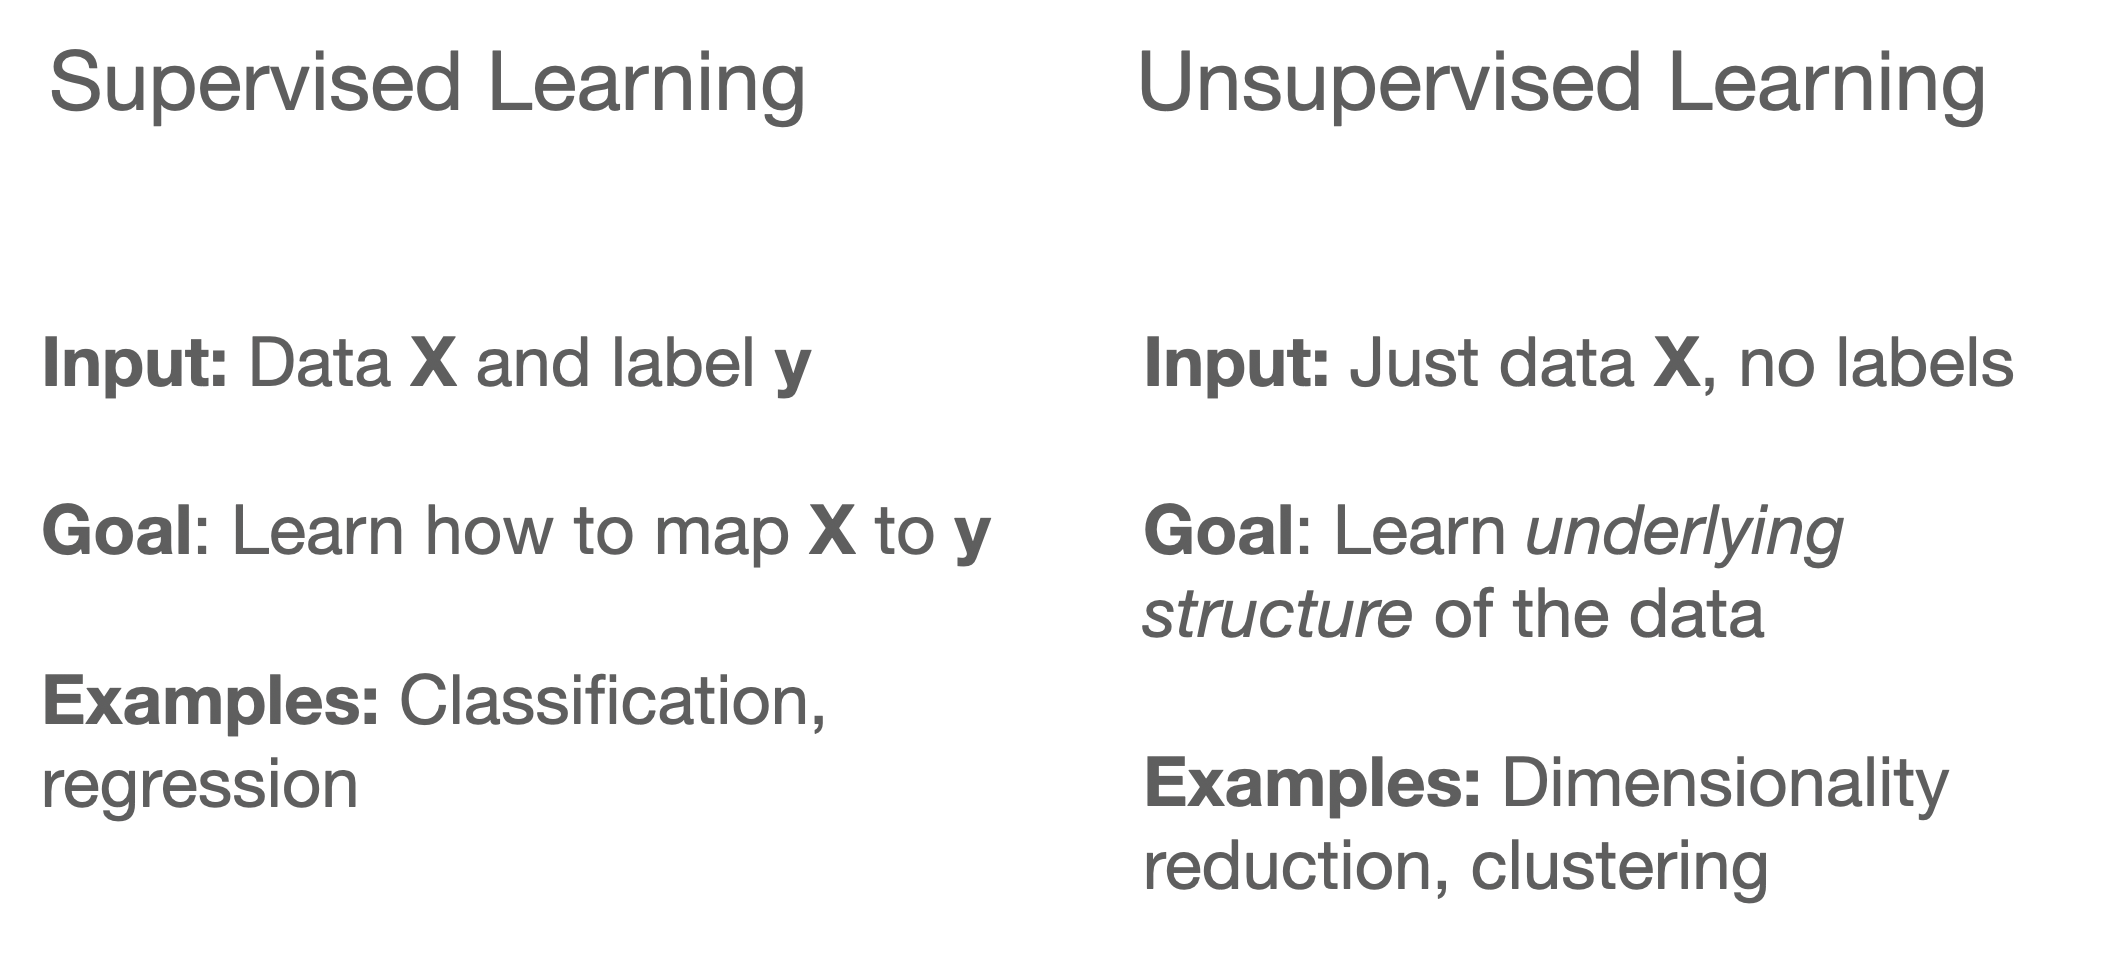

In [13]:
Image('images/ML_flavours.png', width=700)

> discuss FP, training

It all goes back to linear regression. (maybe make a nice figure here)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2012)
n_obs = 25
x = np.random.uniform(0,100, n_obs)
y_true = 2.3*x + 14
y_obs = y_true + np.random.normal(0, 15, n_obs)

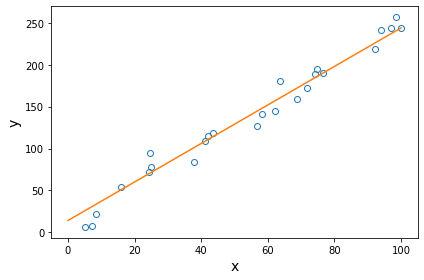

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y_obs, 'o', mfc="None")
ax.plot([0,100], [14, 244])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
fig.tight_layout()

#### Discuss logistic regression

In [5]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

Let us summarize the main concepts of machine learning that we will use today:
* Once data has been processed and explored, we want to represent data as vectors.
* We choose an appropriate model
* We learn from available data by using numerical optimization methods with the aim that the model performs well on data not used for training.

In [6]:
X = x.reshape(-1,1)
reg_model.fit(X, y_obs)

LinearRegression()

The best fit is y = 2.426x + 6.373


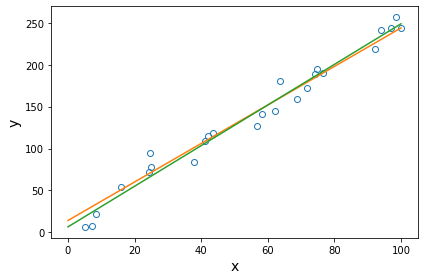

In [7]:
print(f'The best fit is y = {reg_model.coef_[0]:.3f}x + {reg_model.intercept_:.3f}')

fig, ax = plt.subplots()
ax.plot(x, y_obs, 'o', mfc="None")
ax.plot([0,100], [14, 244])
ax.plot([0,100], [reg_model.intercept_, 100*reg_model.coef_[0] + reg_model.intercept_])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
fig.tight_layout()

In [8]:
res = np.polyfit(x, y_obs, 1)
print('Using np.polyfit: y = {:.3f}x + {:.3f}'.format(*res))

Using np.polyfit: y = 2.426x + 6.373


Make the transition to logistic regression.

In [11]:
np.random.seed(1938)
n_obs = 200
mass = np.random.normal(65, 20, size=n_obs)
mass[mass > 70] *= (mass[mass > 70]-60)/60*5
y = (mass > 60).astype(bool)
obs_mass = mass + np.random.normal(0, 7, size=n_obs)
X = obs_mass.reshape(-1,1)

In [12]:
reg_model = LinearRegression()
reg_model.fit(X, y)

y_pred = (reg_model.predict(X) > 0.5).astype(int)

n_incorrect = np.sum((y_pred - y)**2)

accuracy = (n_obs - n_incorrect)/n_obs

print(f'This model has an accuracy of {accuracy:.3f}')

This model has an accuracy of 0.785


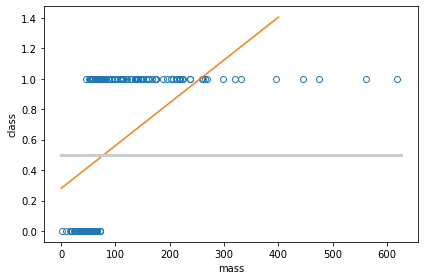

In [13]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', mfc="None")
model = np.poly1d([ reg_model.coef_[0], reg_model.intercept_])
ax.plot([0, 400], model([0,400]))
ax.plot([0,625], [0.5, 0.5], '0.8', lw=3)
ax.set_xlabel('mass')
ax.set_ylabel('class')
fig.tight_layout()

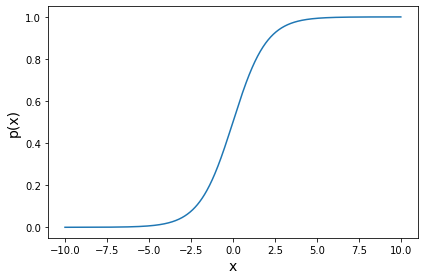

In [9]:
x = np.linspace(-10,10,1000)
p_x = 1/(1 + np.exp(-x))
fig, ax = plt.subplots()
ax.plot(x, p_x)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('p(x)', fontsize=14)
fig.tight_layout()

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [19]:
y_pred = logreg.predict(X).astype(int)

n_incorrect = np.sum((y_pred - y)**2)

accuracy = (n_obs - n_incorrect)/n_obs

print(f'This model has an accuracy of {accuracy:.3f}')

This model has an accuracy of 0.905


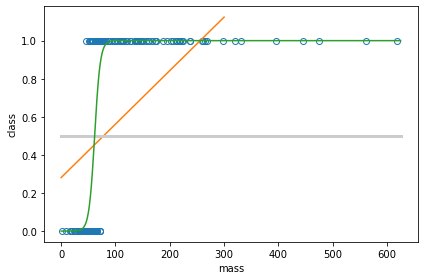

In [20]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o', mfc="None")
model = np.poly1d([ reg_model.coef_[0], reg_model.intercept_])
ax.plot([0, 300], model([0,300]))
ax.plot([0,625], [0.5, 0.5], '0.8', lw=3)

dat_grid = np.linspace(0, 625, 1000)
logmodel = 1/(1 + np.exp(-logreg.intercept_ - logreg.coef_[0]*dat_grid))
ax.plot(dat_grid, logmodel)
ax.set_xlabel('mass')
ax.set_ylabel('class')
fig.tight_layout()

TBD: last 45 mins, introduce new dataset


## Mini-hackaton: Let's do some data science

You have all been assigned to teams of 3 people, and in total we are 10 teams. For reasons of simplicity, the teams have been named after a star.

We have Team Sirius, Alpha Centauri, Betelgeuse, Rigel, Altair, Vega, Deneb, Errai, Capella and Aldebaran. Now the idea of this mini-hackaton is that we work together for the next hour on a few questions. Some of the questions will be collaborative, some will be independent. Each question will come with a number of points, which are hidden to the teams.

The idea is for us to learn and to have fun while we play with machine learning.

### Q2: What is the first thing we need to worry about? 

A. Model

B. Data

C. Learning

D. Deep Neural Network with a Convolutional Layer

E. Dinner, Jo. Duh.